In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

In [3]:
!wget $data

--2024-10-07 19:43:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.2’

laptops.csv.2       100%[===================>] 291.58K  --.-KB/s    in 0.006s  

2024-10-07 19:43:04 (46.8 MB/s) - ‘laptops.csv.2’ saved [298573/298573]



In [4]:
df = pd.read_csv('laptops.csv')

In [5]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [8]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [9]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


<Axes: xlabel='final_price', ylabel='Count'>

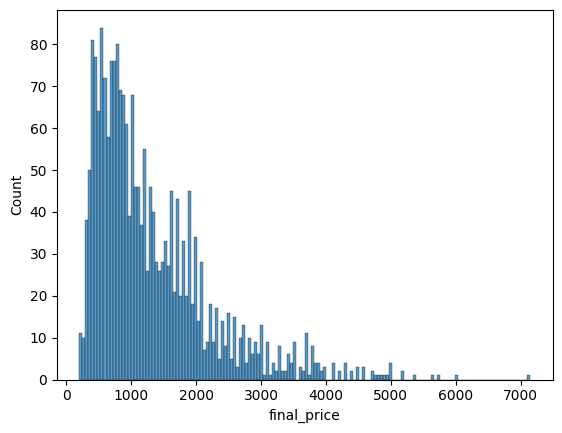

In [10]:
sns.histplot(df.final_price, bins = 150)

In [11]:
columns = ['ram', 'storage', 'screen', 'final_price']
df = df[columns]

In [12]:
#Check for missing values
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [13]:
df["ram"].median()

np.float64(16.0)

In [14]:
mean_value = df['screen'].mean()
mean_value

np.float64(15.168112244897959)

In [15]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [16]:
n_val, n_test, n_train

(432, 432, 1296)

In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [20]:
len(df_train), len(df_test), len(df_val)

(1296, 432, 432)

In [21]:
df_test = df_test.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [22]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [23]:
#Log transformation to price column
y_train = np.log1p(df_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)
y_val = np.log1p(df_val.final_price.values)

<Axes: xlabel='final_price', ylabel='Count'>

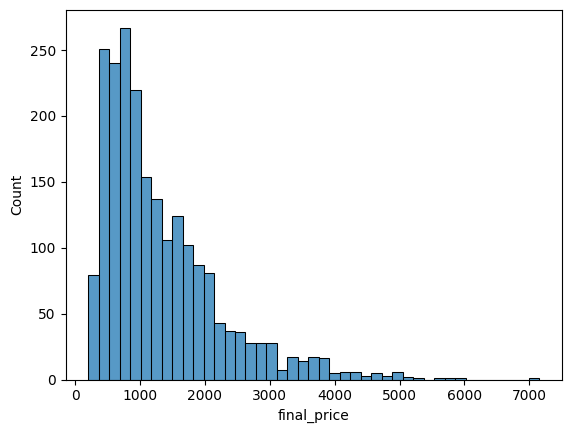

In [24]:
sns.histplot(df.final_price)

In [25]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [26]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]
    return res

In [27]:
def linear_regression(X):
    return X.dot(w_new)

In [55]:
def prepare_X(df):
    base = ['ram', 'storage', 'screen']
    df_num = df[base].fillna(df[base].median())  
    X = df_num.values
    ones = np.ones((X.shape[0], 1)) 
    X = np.column_stack([ones, X]) 
    return X

In [56]:
def train_linear_regression(X, y, r=0.001):
    XTX = X.T.dot(X)
    XTX_reg = XTX + r * np.eye(XTX.shape[0]) 
    XTX_inv = np.linalg.inv(XTX_reg)
    w = XTX_inv.dot(X.T).dot(y)
    return w

In [57]:
X_train = prepare_X(df_train)
w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = X_val.dot(w)

In [58]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [59]:
# Filling missing values with zero
df_train_zero = df_train.fillna(0)
X_train_zero = prepare_X(df_train_zero)

w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = X_val.dot(w_zero)
rmse_zero = rmse(y_val, y_pred_zero)

# Filling missing values with mean
mean_values = df_train.mean()
df_train_mean = df_train.fillna(mean_values)
X_train_mean = prepare_X(df_train_mean)

w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = X_val.dot(w_mean)
rmse_mean = rmse(y_val, y_pred_mean)

# Compare RMSE values
print(f"RMSE (zero): {rmse_zero}, RMSE (mean): {rmse_mean}")

RMSE (zero): 0.4077182276099695, RMSE (mean): 0.40753567937895846


In [60]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

for r in r_values:
    XTX = X_train.T.dot(X_train)
    XTX_reg = XTX + r * np.eye(XTX.shape[0])
    XTX_reg[0, 0] -= r
    XTX_inv_reg = np.linalg.inv(XTX_reg)
    w_full_reg = XTX_inv_reg.dot(X_train.T).dot(y_train)
    
    y_pred_reg = X_val.dot(w_full_reg) 
    
    rmse_reg = rmse(y_val, y_pred_reg)
    print(f"RMSE (r={r}): {rmse_reg}")
    
    if rmse_reg < best_rmse:
        best_rmse = rmse_reg
        best_r = r

print(f"Best RMSE: {best_rmse}, Best r: {best_r}")

RMSE (r=0): 0.4075447431192407
RMSE (r=0.01): 0.40754478116269655
RMSE (r=0.1): 0.40754512354196765
RMSE (r=1): 0.40754854616297487
RMSE (r=5): 0.4075637320635933
RMSE (r=10): 0.40758265543479033
RMSE (r=100): 0.4079122949564144
Best RMSE: 0.4075447431192407, Best r: 0


In [61]:
rmse_scores = []
seeds = list(range(10))

for seed in seeds:
    # Shuffle and split data
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    
    train_idx = idx[:int(0.6 * len(df))]
    val_idx = idx[int(0.6 * len(df)):int(0.8 * len(df))]
    test_idx = idx[int(0.8 * len(df)):]
    
    df_train, df_val, df_test = df.iloc[train_idx], df.iloc[val_idx], df.iloc[test_idx]
    
    # Train model with missing values filled with 0
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    y_train = np.log1p(df_train['final_price'].values)
    y_val = np.log1p(df_val['final_price'].values)
    
    # Train model and predict
    w = train_linear_regression(X_train, y_train)
    y_pred = X_val.dot(w)
    
    # Calculate RMSE
    rmse_score = rmse(y_val, y_pred)
    rmse_scores.append(rmse_score)

# Compute standard deviation of RMSE scores
rmse_std = np.std(rmse_scores)
round(rmse_std, 3)
print(f"Standard deviation of RMSE scores: {rmse_std}")

Standard deviation of RMSE scores: 0.013752301458277901


In [62]:
# Final model training with seed 9 - Q6
np.random.seed(9)
idx = np.arange(len(df))
np.random.shuffle(idx)

train_idx = idx[:int(0.6 * len(df))]
val_idx = idx[int(0.6 * len(df)):int(0.8 * len(df))]
test_idx = idx[int(0.8 * len(df)):]

df_train, df_val, df_test = df.iloc[train_idx], df.iloc[val_idx], df.iloc[test_idx]
df_combined = pd.concat([df_train, df_val])

# Fill missing values with 0 and train model
X_train_combined = prepare_X(df_combined)
X_test = prepare_X(df_test)
y_train_combined = np.log1p(df_combined['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

# Regularization with r=0.001
r = 0.001
XTX = X_train_combined.T.dot(X_train_combined)
XTX_reg = XTX + r * np.eye(XTX.shape[0])
XTX_inv_reg = np.linalg.inv(XTX_reg)
w_full_reg = XTX_inv_reg.dot(X_train_combined.T).dot(y_train_combined)

y_pred_test = X_test.dot(w_full_reg)

rmse_test = rmse(y_test, y_pred_test)
print(f"Final RMSE on test set: {rmse_test}")

Final RMSE on test set: 0.4580382163120694
